In [1]:
# Inferences
# 1. ON AVERAGE, THE SIZE OF THE TUMOR VOLUME DECREASED OVER THE TIME PERIOD WHEN TREATED WITH CAPOMULIN
# 2. CAPOMULIN AND RAMICANE SHOWED THE MOST PROMISE WITH THE GREATEST AMOUNT OF DECREASE IN TUMOR SIZE OVER TIME
# 3. THE CORRELATION OF MOUSE WEIGHT AND TUMOR VOLUME IS CONSIDERED STRONG, WHERE AS THE GREATER THE WEIGHT, THE GREATER THE SIZE OF TUMOR

# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")


# Display the data table for preview
study_data_complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
mouse_count = study_data_complete_df["Mouse ID"].nunique()
print(mouse_count)

249


In [3]:
dupid = study_data_complete_df.groupby(['Mouse ID','Timepoint'])['Mouse ID'].agg(countid = ('Mouse ID', 'count')).query('countid > 1')
dupid.index[0][0]

'g989'

In [4]:
study_data_complete_df.loc[study_data_complete_df['Mouse ID'] == dupid.index[0][0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
filderdf = study_data_complete_df.loc[study_data_complete_df['Mouse ID'] != dupid.index[0][0]].head(5)

In [6]:
uniquemice = study_data_complete_df.loc[study_data_complete_df['Mouse ID'] != dupid.index[0][0]].nunique()
uniquemice["Mouse ID"]

248

In [7]:
uniquemice = study_data_complete_df.loc[study_data_complete_df['Mouse ID'] != dupid.index[0][0]]

summary_df = pd.DataFrame({"Mean Tumor Volume":uniquemice.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean(),
"Median Tumor Volume":uniquemice.groupby('Drug Regimen')["Tumor Volume (mm3)"].median() ,
"Tumor Volume Variance":uniquemice.groupby('Drug Regimen')["Tumor Volume (mm3)"].var() ,
"Tumor Volume Std. Dev.": uniquemice.groupby('Drug Regimen')["Tumor Volume (mm3)"].std(),
"Tumor Volume Std. Err.": uniquemice.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()
},
index=['Drug Regimen','Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'])
summary_df.replace(np.nan, '', regex=True)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.99477,0.329346
Ceftamin,52.5912,51.7762,39.2902,6.26819,0.469821
Infubinol,52.8848,51.8206,43.1287,6.56724,0.492236
Ketapril,55.2356,53.6987,68.5536,8.27971,0.60386
Naftisol,54.3316,52.5093,66.1735,8.13471,0.596466
Placebo,54.0336,52.2889,61.1681,7.821,0.581331
Propriva,52.3209,50.4463,43.852,6.62209,0.544332
Ramicane,40.2167,40.6732,23.4867,4.84631,0.320955
Stelasyn,54.2331,52.4317,59.4506,7.71042,0.573111


In [8]:
pd.options.mode.chained_assignment = None  # default='warn'

study_data_complete_df.loc[study_data_complete_df['Mouse ID'] != dupid.index[0][0]]
aggMice = uniquemice.groupby('Drug Regimen').agg( 
    mean = ('Tumor Volume (mm3)', 'mean'),   
    median = ('Tumor Volume (mm3)', 'median'),
    var = ('Tumor Volume (mm3)', 'var'),
    std = ('Tumor Volume (mm3)', 'std'),
    sem = ('Tumor Volume (mm3)', 'sem')
)
aggMice.columns = pd.MultiIndex.from_product([["Tumor Volume (mm3)"], aggMice.columns])
aggMice

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

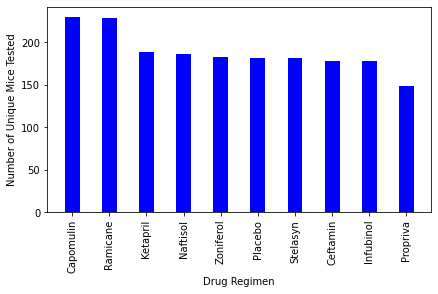

In [9]:
import numpy as np 
import matplotlib.pyplot as plotter
uniquemice = study_data_complete_df.loc[study_data_complete_df['Mouse ID'] != dupid.index[0][0]]
a = uniquemice.groupby(['Drug Regimen'])['Mouse ID'].agg(countid = ('Mouse ID', 'count')).sort_values('countid',ascending=False)
plotter.bar(list(a.axes[0]),list(a['countid']), color ='blue',width = 0.4)
plotter.xlabel("Drug Regimen") 
plotter.ylabel("Number of Unique Mice Tested") 
plotter.xticks(rotation='vertical')
plotter.tight_layout(pad=0.4)

plotter.show() 

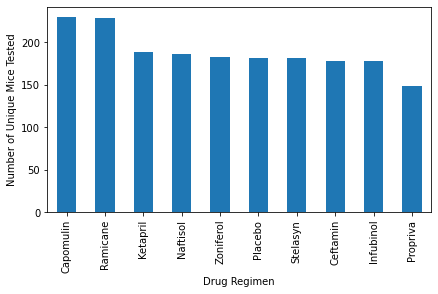

In [10]:
uniquemice = study_data_complete_df.loc[study_data_complete_df['Mouse ID'] != dupid.index[0][0]]
ax = uniquemice.groupby(['Drug Regimen'])['Mouse ID'].agg(countid = ('Mouse ID', 'count')).sort_values('countid',ascending=False).plot(kind = "bar") 

ax.set(xlabel='Drug Regimen', ylabel='Number of Unique Mice Tested')
ax.get_legend().remove()
plt.tight_layout(pad=0.4)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000029635937610>],
      dtype=object)

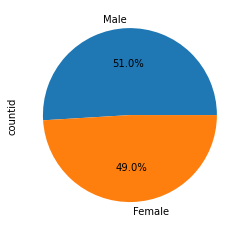

In [11]:
uniquemice = study_data_complete_df.loc[study_data_complete_df['Mouse ID'] != dupid.index[0][0]]
ax = uniquemice.groupby(['Sex'])['Mouse ID'].agg(countid = ('Mouse ID', 'count')).sort_values('countid',ascending=False)
ax.plot.pie(subplots=True,legend=None,grid=True,autopct='%1.1f%%')




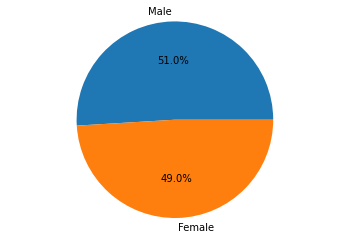

In [12]:
uniquemice = study_data_complete_df.loc[study_data_complete_df['Mouse ID'] != dupid.index[0][0]]
df = uniquemice.groupby(['Sex'])['Mouse ID'].agg(countid = ('Mouse ID', 'count')).sort_values('countid',ascending=False)
fig1, ax1 = plt.subplots()
ax1.pie(list(df['countid']), labels=list(df.axes[0]), autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [13]:
max_timepoint = uniquemice.groupby(["Mouse ID"])['Timepoint'].max()
max_timepoint.reset_index(drop=True)
max_timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [14]:
merged_data = pd.merge(max_timepoint, uniquemice, on=['Mouse ID', 'Timepoint'], how='left')
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# INSTRUCTOR GIVEN CODE!!


# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


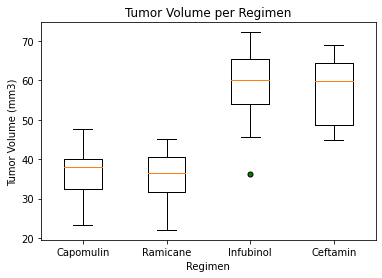

In [16]:
# data = tumor_vol_list
# fig, ax = plt.subplots()
# ax.boxplot(tumor_vol_list)

plt.title("Tumor Volume per Regimen")
flierprops = dict(marker='o', markerfacecolor='g', markersize = 5)
plt.boxplot(tumor_vol_list, labels=treatment_list, flierprops = flierprops)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Regimen")
plt.show()






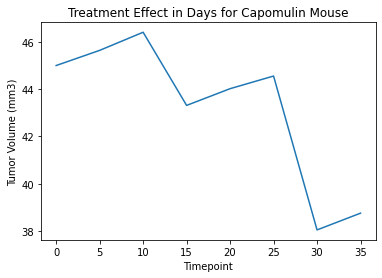

In [17]:
capomulinMouse = uniquemice.loc[(uniquemice['Drug Regimen'] == 'Capomulin')]
capomulinMouse
j246 = capomulinMouse.loc[(capomulinMouse['Mouse ID'] == 'j246')]
j246
timepointcapomulinMouse = j246['Timepoint']
plt.plot(timepointcapomulinMouse, j246['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Treatment Effect in Days for Capomulin Mouse")
plt.show()

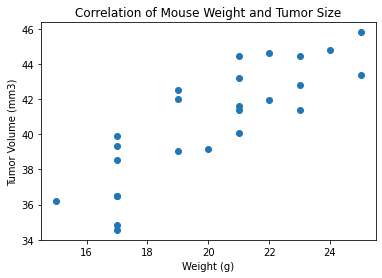

In [18]:
cMouse = capomulinMouse.groupby('Mouse ID')
avg = cMouse.mean()
avgTumor = avg['Tumor Volume (mm3)']
x = avg['Weight (g)']
plt.scatter(x,avgTumor)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Correlation of Mouse Weight and Tumor Size")
plt.show()

The correlation between mouse weight and the average tumor volume is 0.59


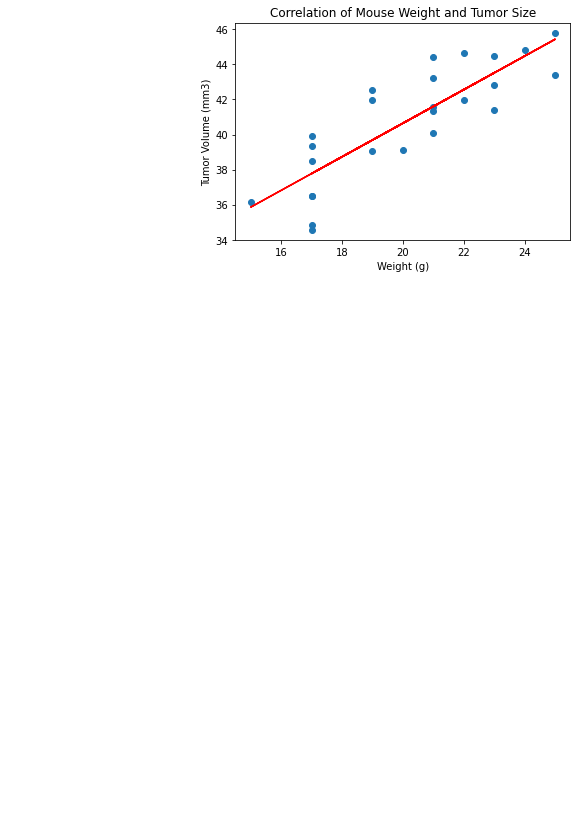

In [19]:
cMouse = capomulinMouse.groupby('Mouse ID')
avg = cMouse.mean()
avgTumor = avg['Tumor Volume (mm3)']
x = avg['Weight (g)']
x_values = x
y_values = avgTumor
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq ,(7,2),fontsize=15,color="green")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Correlation of Mouse Weight and Tumor Size")

Weight = uniquemice.iloc[:,7]
TumorVolume = uniquemice.iloc[:,2]
correlation = st.pearsonr(Weight,TumorVolume)

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.show()